## DAMAGE STATE PREDICTION OF RC-BRIDGES WITH RANDOM PIER SCOURING IMPACTED BY EARTHQUAKE

This ipynb file is created for developing an ANN-MLP-based predictive GUI model to predict the damage state of multi-span RC bridges impacted by the simultaneous effect of random pier scouring and earthquake. It will be used for writing a conference paper (IRF2025) in Jan 2025. Please note that the dataset used for training and testing the ANN model is obtained from Dr. Ali Raoof Mehrpour Hosseini's papers.

### Importing important and primary libraries:

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Load data from CSV file:

In [2]:
# the address of the file may differ on different systems, so change the file address if you are running this notebook on your computer
import pandas as pd
df = pd.read_csv("e:/RCBridgeDataSetbyArefJozi.csv")
df

,faultindex,pgalong,pgatran,sat11,sat12,phi,scourdepthp1,scourdepthp2,scourdepthp3,numeliminatedspringsp1,numeliminatedspringsp2,numeliminatedspringsp3,absmaxstrainconcretecompression,absmaxstrainrebartension,damageindex
0,1,0.28600,0.348,0.32877,0.49779,30,0.00,0.00,0.00,0,0,0,0.000839,0.000760,0
1,1,0.28600,0.348,0.32877,0.49779,30,2.75,2.00,2.25,11,8,9,0.000869,0.000802,0
2,1,0.28600,0.348,0.32877,0.49779,30,3.25,1.75,2.50,13,7,10,0.000876,0.000796,0
3,1,0.28600,0.348,0.32877,0.49779,30,2.25,1.00,2.00,9,4,8,0.000861,0.000764,0
4,1,0.28600,0.348,0.32877,0.49779,30,2.00,4.00,4.00,8,16,16,0.000886,0.000858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2,0.10094,0.069,0.08846,0.11453,40,2.50,1.75,2.25,10,7,9,0.000195,0.000014,0
1196,2,0.10094,0.069,0.08846,0.11453,40,1.00,1.00,2.00,4,4,8,0.000191,0.000011,0
1197,2,0.10094,0.069,0.08846,0.11453,40,2.00,3.25,1.75,8,13,7,0.000190,0.000017,0
1198,2,0.10094,0.069,0.08846,0.11453,40,1.75,2.00,2.75,7,8,11,0.000195,0.000016,0


In [3]:
df = df.drop('absmaxstrainconcretecompression', axis=1)
df = df.drop('absmaxstrainrebartension' , axis=1)
df = df.drop('numeliminatedspringsp1' , axis=1)
df = df.drop('numeliminatedspringsp2' , axis=1)
df = df.drop('numeliminatedspringsp3' , axis=1)
df

,faultindex,pgalong,pgatran,sat11,sat12,phi,scourdepthp1,scourdepthp2,scourdepthp3,damageindex
0,1,0.28600,0.348,0.32877,0.49779,30,0.00,0.00,0.00,0
1,1,0.28600,0.348,0.32877,0.49779,30,2.75,2.00,2.25,0
2,1,0.28600,0.348,0.32877,0.49779,30,3.25,1.75,2.50,0
3,1,0.28600,0.348,0.32877,0.49779,30,2.25,1.00,2.00,0
4,1,0.28600,0.348,0.32877,0.49779,30,2.00,4.00,4.00,0
...,...,...,...,...,...,...,...,...,...,...
1195,2,0.10094,0.069,0.08846,0.11453,40,2.50,1.75,2.25,0
1196,2,0.10094,0.069,0.08846,0.11453,40,1.00,1.00,2.00,0
1197,2,0.10094,0.069,0.08846,0.11453,40,2.00,3.25,1.75,0
1198,2,0.10094,0.069,0.08846,0.11453,40,1.75,2.00,2.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   faultindex    1200 non-null   int64  
 1   pgalong       1200 non-null   float64
 2   pgatran       1200 non-null   float64
 3   sat11         1200 non-null   float64
 4   sat12         1200 non-null   float64
 5   phi           1200 non-null   int64  
 6   scourdepthp1  1200 non-null   float64
 7   scourdepthp2  1200 non-null   float64
 8   scourdepthp3  1200 non-null   float64
 9   damageindex   1200 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 93.9 KB


In [5]:
df.describe()

,faultindex,pgalong,pgatran,sat11,sat12,phi,scourdepthp1,scourdepthp2,scourdepthp3,damageindex
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1.500000,0.415014,0.355819,0.511943,0.483070,35.000000,2.350000,2.350000,2.350000,0.431667
std,0.500208,0.347617,0.215721,0.373748,0.365216,4.084185,1.195278,1.195278,1.195278,0.982073
min,1.000000,0.070830,0.069000,0.088460,0.072070,30.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.189625,0.158892,0.240393,0.223765,30.000000,1.750000,1.750000,1.750000,0.000000
50%,1.500000,0.309300,0.334900,0.380045,0.378835,35.000000,2.375000,2.375000,2.375000,0.000000
75%,2.000000,0.566942,0.538052,0.710035,0.565998,40.000000,3.250000,3.250000,3.250000,0.000000
max,2.000000,1.779420,0.990240,1.658880,1.688240,40.000000,4.000000,4.000000,4.000000,3.000000


In [6]:
X = df [['faultindex', 'pgalong', 'pgatran', 'sat11', 'sat12', 'phi','scourdepthp1', 'scourdepthp2', 'scourdepthp3']].values
X[0:5]

array([[ 1.     ,  0.286  ,  0.348  ,  0.32877,  0.49779, 30.     ,
         0.     ,  0.     ,  0.     ],
       [ 1.     ,  0.286  ,  0.348  ,  0.32877,  0.49779, 30.     ,
         2.75   ,  2.     ,  2.25   ],
       [ 1.     ,  0.286  ,  0.348  ,  0.32877,  0.49779, 30.     ,
         3.25   ,  1.75   ,  2.5    ],
       [ 1.     ,  0.286  ,  0.348  ,  0.32877,  0.49779, 30.     ,
         2.25   ,  1.     ,  2.     ],
       [ 1.     ,  0.286  ,  0.348  ,  0.32877,  0.49779, 30.     ,
         2.     ,  4.     ,  4.     ]])

In [7]:
y = df ['damageindex'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Preprocessing and normalizing

In [8]:
# normalize the dataset using Standard Scaler
from sklearn import preprocessing
print('original data :\n')
print(X[0:5])
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
print('\nnormalized data:\n')
print(X[0:5])

original data :

[[ 1.       0.286    0.348    0.32877  0.49779 30.       0.       0.
   0.     ]
 [ 1.       0.286    0.348    0.32877  0.49779 30.       2.75     2.
   2.25   ]
 [ 1.       0.286    0.348    0.32877  0.49779 30.       3.25     1.75
   2.5    ]
 [ 1.       0.286    0.348    0.32877  0.49779 30.       2.25     1.
   2.     ]
 [ 1.       0.286    0.348    0.32877  0.49779 30.       2.       4.
   4.     ]]

normalized data:

[[-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
  -1.96688878 -1.96688878 -1.96688878]
 [-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
   0.33478958 -0.29294088 -0.0836974 ]
 [-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
   0.75327656 -0.50218437  0.12554609]
 [-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
  -0.0836974  -1.12991483 -0.29294088]
 [-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
  -0.29294088  1.38100702  1.3

In [9]:
X.shape

(1200, 9)

In [10]:
y.shape

(1200,)

### Train test split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
# "Do not change the random state". random state is a command that shuffles the data in a certain manner.
# so changing the random state will change the shuffeling which leads to big changes in the final results
# we want the changes be constant each time we run the program
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (960, 9) (960,)
Test set: (240, 9) (240,)


In [12]:
X_train[0]

array([-1.        , -0.72136368, -0.93603793, -0.36776138, -0.28805983,
        0.        , -0.0836974 ,  0.33478958, -1.12991483])

In [13]:
X_test[0]

array([ 1.        , -0.12143001,  1.24240089,  1.54734864,  0.17780379,
       -1.22474487, -0.50218437, -0.0836974 , -0.50218437])

In [14]:
# Calculate descriptive statistics for X_test

mean = np.mean(X_test)
median = np.median(X_test)
min_val = np.min(X_test)
max_val = np.max(X_test)
std_dev = np.std(X_test)

# Print the summary
print("normalized X_test stats:")
print("Mean:", mean)
print("Median:", median)
print("Minimum:", min_val)
print("Maximum:", max_val)
print("Standard Deviation:", std_dev)

normalized X_test stats:
Mean: 0.03218270187138771
Median: -0.06001933424775463
Minimum: -1.96688878399783
Maximum: 3.9266688402398953
Standard Deviation: 1.0176061081736465


In [15]:
# Calculate descriptive statistics for y_test


mean = np.mean(y_test)
median = np.median(y_test)
min_val = np.min(y_test)
max_val = np.max(y_test)
std_dev = np.std(y_test)

# Print the summary
print("normalized y_test stats:")
print("Mean:", mean)
print("Median:", median)
print("Minimum:", min_val)
print("Maximum:", max_val)
print("Standard Deviation:", std_dev)

normalized y_test stats:
Mean: 0.49166666666666664
Median: 0.0
Minimum: 0
Maximum: 3
Standard Deviation: 1.020586704901755


### Classification by Neural Network

Our predictor model name is DNNmodel which stands for Deep Neural Network model.
"4 hidden layers" ANN model was selected.
4 hidden layers is common for an ANN model in majority of analyses. 
Also, in my previous efforts and modelings, less and more hidden layers were employed, but 4 hidden layers turned out to be optimum and had the best performance. Therefore it was selected.

In [16]:

DNNmodel = keras.Sequential()

# in order to prevent overfitting we can define a function named dropuot which randomly turns off 
# the neurons in each layer in each iteration (0.5 means that 50% of neurons will not work). 
# in this situation, the complexity of the nn model decreases and the model does not memorize the train set.

DNNmodel.add(keras.layers.Input(shape = (9,)))

DNNmodel.add(keras.layers.Dense( units = 128 , activation='relu' ))
DNNmodel.add(keras.layers.Dropout(0.2))
DNNmodel.add(keras.layers.Dense( units = 128 , activation='relu' ))
DNNmodel.add(keras.layers.Dropout(0.2))
DNNmodel.add(keras.layers.Dense( units = 128 , activation='relu' ))
DNNmodel.add(keras.layers.Dropout(0.2))
DNNmodel.add(keras.layers.Dense( units = 128 , activation='relu' ))
DNNmodel.add(keras.layers.Dropout(0.2))

# With this configuration, the model will output probabilities for each of the 4 classes, 
# and the softmax activation ensures that these probabilities sum up to 1 across all classes.

DNNmodel.add(keras.layers.Dense( units = 4 , activation='softmax'))


DNNmodel.compile(optimizer = tf.optimizers.Adam(), loss = tf.losses.SparseCategoricalCrossentropy() , metrics = ['accuracy'])

In [17]:
DNNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               1

In [18]:
hist = DNNmodel.fit (X_train , y_train , epochs=100 , batch_size = 128 , validation_data = (X_test , y_test))

Epoch 1/100
8/8 [==============================] - 1s 34ms/step - loss: 1.1267 - accuracy: 0.6646 - val_loss: 0.8055 - val_accuracy: 0.7875
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6095 - accuracy: 0.8260 - val_loss: 0.5175 - val_accuracy: 0.7875
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4172 - accuracy: 0.8375 - val_loss: 0.4039 - val_accuracy: 0.8750
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3247 - accuracy: 0.8865 - val_loss: 0.3696 - val_accuracy: 0.8833
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2835 - accuracy: 0.8948 - val_loss: 0.3421 - val_accuracy: 0.8833
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2678 - accuracy: 0.9000 - val_loss: 0.3312 - val_accuracy: 0.8875
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2482 - accuracy: 0.9031 - val_loss: 0.3235 - val_accuracy: 0.8875
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 7ms/step - loss: 0.1003 - accuracy: 0.9563 - val_loss: 0.3017 - val_accuracy: 0.9250
Epoch 60/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1001 - accuracy: 0.9573 - val_loss: 0.2868 - val_accuracy: 0.9250
Epoch 61/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1054 - accuracy: 0.9594 - val_loss: 0.3147 - val_accuracy: 0.9250
Epoch 62/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0933 - accuracy: 0.9688 - val_loss: 0.3193 - val_accuracy: 0.9167
Epoch 63/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1048 - accuracy: 0.9646 - val_loss: 0.3225 - val_accuracy: 0.9042
Epoch 64/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0885 - accuracy: 0.9604 - val_loss: 0.3156 - val_accuracy: 0.9292
Epoch 65/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1006 - accuracy: 0.9688 - val_loss: 0.3093 - val_accuracy: 0.9167
Epoch 66/100
8/8 [===============

### Plotting the results and evaluating of the model

Text(0.5, 0, 'Epoch')

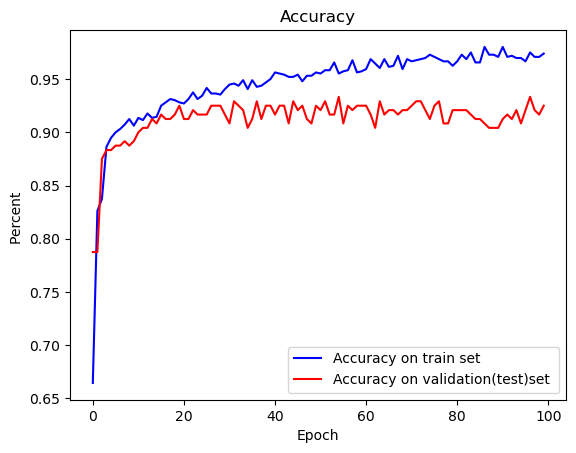

In [19]:
plt.plot( hist.history['accuracy'] , color = 'blue' )
plt.plot( hist.history['val_accuracy'] , color = 'red' )

# decrease in Accuracy on validation(test)set and increase in Accuracy on train set
# means overfitting after the turning point in epoch number (57)

plt.title('Accuracy')
plt.legend(('Accuracy on train set', 'Accuracy on validation(test)set '))
plt.ylabel('Percent ')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

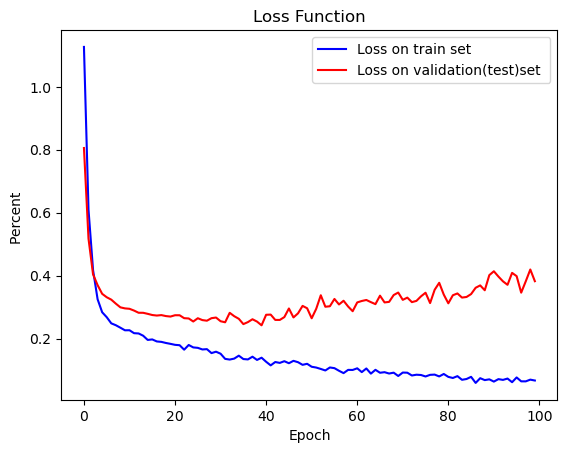

In [20]:
plt.plot( hist.history['loss'] , color = 'blue' )
plt.plot( hist.history['val_loss'] , color = 'red' )


# decrease in Loss on train set and increase in Loss on validation(test)set
# means overfitting after the turning point in epoch number (???)


plt.title('Loss Function')
plt.legend(('Loss on train set', 'Loss on validation(test)set '))
plt.ylabel('Percent ')
plt.xlabel('Epoch')

In [21]:
predictions = DNNmodel.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

8/8 [==============================] - 0s 1ms/step


In [22]:
print('\n y_test ')
print(y_test [0:240])

print('predicted class ')
print(predicted_classes [0:240])



 y_test 
[0 0 0 0 0 0 1 0 0 1 0 2 3 0 1 0 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 3 2 1 0 3 0 0 0 0 0 3 3 0 0 1 0 0 0 0
 0 0 2 0 0 0 0 0 2 1 0 0 0 0 0 3 0 2 0 0 3 3 0 0 1 0 0 0 0 0 0 0 0 0 2 3 0
 1 0 0 0 0 0 3 0 0 2 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 2 0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 3 3 3 0 0 0 0 0
 1 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0]
predicted class 
[0 0 0 0 0 0 0 0 0 3 0 2 3 0 1 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 3 3 1 0 0 0 0 0 0 0 3 2 0 0 1 0 0 0 0
 0 0 3 0 0 0 0 0 3 1 0 0 0 0 0 3 0 1 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0
 1 0 0 0 0 0 3 0 0 3 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 1 0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 3 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0 0 3 0 3 0 0 0 0 0
 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 

In [23]:
predictions

array([[9.99999940e-01, 1.21003607e-09, 5.57997849e-11, 8.53111505e-12],
       [9.99999940e-01, 1.19927112e-13, 6.06605220e-14, 7.38511357e-14],
       [9.99988019e-01, 9.30091937e-06, 1.75802677e-06, 8.69496603e-07],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99999940e-01, 1.45574373e-26, 2.06800008e-29, 2.14497273e-29],
       [9.99999940e-01, 1.82566656e-35, 3.86818112e-35, 3.81720264e-33],
       [8.06015909e-01, 1.84883237e-01, 2.18414492e-03, 6.91670878e-03],
       [9.99999940e-01, 7.34679488e-27, 1.31520437e-27, 6.49595139e-27],
       [9.99999940e-01, 2.97034175e-10, 5.28209475e-13, 2.56437829e-13],
       [3.68343443e-01, 3.45388427e-02, 8.16219300e-03, 5.88955462e-01],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.10633874e-04, 1.98913412e-03, 9.41201806e-01, 5.60984053e-02],
       [7.45042935e-02, 1.83362179e-02, 1.58033408e-02, 8.91356170e-01],
       [9.99997437e-01, 2.56010526e-06, 9.23566468e

### ANN model test set accuracy and confusion matrix

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       189
           1       0.78      0.58      0.67        12
           2       0.57      0.36      0.44        11
           3       0.74      0.82      0.78        28

    accuracy                           0.93       240
   macro avg       0.77      0.69      0.72       240
weighted avg       0.92      0.93      0.92       240



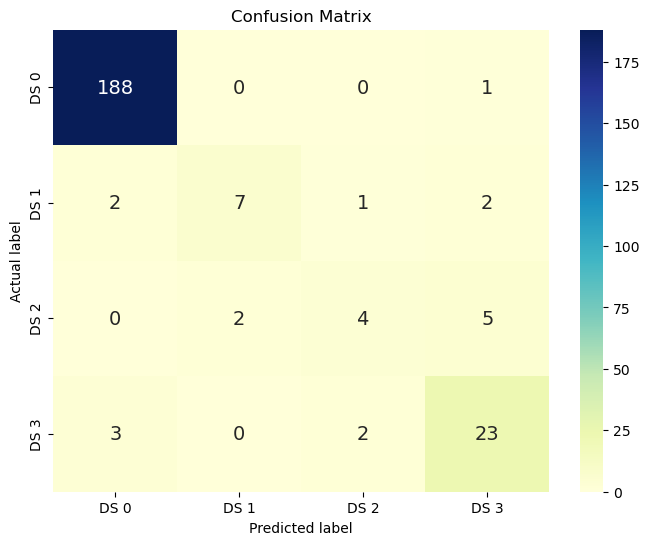

In [24]:
# confusion matrix :

from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_classes, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, predicted_classes))

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix,annot=True, fmt="d", cmap="YlGnBu",  annot_kws={"size": 14}, xticklabels=['DS 0', 'DS 1' , 'DS 2' , 'DS 3'], yticklabels=['DS 0', 'DS 1', 'DS 2' , 'DS 3'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Confusion matrix (Simple version)
cnf_matrix = confusion_matrix(y_test, predicted_classes, labels=[0,1,2,3])

# Print the confusion matrix
print("Confusion Matrix:")
print(cnf_matrix)

Confusion Matrix:
[[188   0   0   1]
 [  2   7   1   2]
 [  0   2   4   5]
 [  3   0   2  23]]


In [26]:
print("Shape of y_test:", y_test.shape)
print("Shape of predicted_classes:", predicted_classes.shape)

Shape of y_test: (240,)
Shape of predicted_classes: (240,)


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')
f1 = f1_score(y_test, predicted_classes, average='weighted')

print("Test set precision:", precision)
print("Test set recall:", recall)
print("Test set F1 score:", f1)

Test set precision: 0.9187369504601663
Test set recall: 0.925
Test set F1 score: 0.9197950457334608


In [28]:
# jaccard_score : 

from sklearn.metrics import jaccard_score
print("jaccard_score : ")
jaccard_score(y_test, predicted_classes , average='weighted',pos_label=1)

jaccard_score : 


0.8757766050291823

### ANN model train set accuracy

In [29]:
predictiontrain = DNNmodel.predict(X_train)
predictiontrainclasses = predictiontrain.argmax(axis=1)

30/30 [==============================] - 0s 1ms/step


In [30]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true = y_train , y_pred = predictiontrainclasses)
acc_train

0.9885416666666667

### GUI

In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QLineEdit, QPushButton, QVBoxLayout, QHBoxLayout, QMessageBox, QFormLayout, QGridLayout,  QFrame
from PyQt5.QtGui import QDoubleValidator, QIntValidator
import numpy as np



class DamagePredictionApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()
        
    def initUI(self):
        self.setWindowTitle('RC Bridges DS Predictor')
        
        layout = QVBoxLayout()
        
        
        # Add your name at the top
        self.name_label = QLabel('Developed by Aref Jozi\nQazvin Islamic Azad University, Qazvin, Iran\nPowered by ANN-MLP', self)
        self.name_label.setStyleSheet("font-size: 8pt; font-weight: bold; color: blue;")
        layout.addWidget(self.name_label)
        
        # Form layout for aligned input fields
        form_layout = QFormLayout()
        self.input_fields = {}
        
        
        # Feature input fields
        self.inputs = []
        self.labels = [
            'faultindex      ', 'pgalong        ', 'pgatran        ', 'sat11           ', 'sat12           ', 'phi               ',
            'scourdepthp1', 'scourdepthp2', 'scourdepthp3'
        ]
        
        
        for i in range(len(self.labels)):
            hbox = QHBoxLayout()
            label = QLabel(self.labels[i])
            input_field = QLineEdit(self)
            self.inputs.append(input_field)
            hbox.addWidget(label)
            hbox.addWidget(input_field)
            layout.addLayout(hbox)
        
        # Predict button
        self.predict_button = QPushButton('Predict', self)
        self.predict_button.setStyleSheet(
        "background-color: green; color: white; font-size: 12pt; font-weight: bold; padding: 5px;"
        )
        
        self.predict_button.clicked.connect(self.predict)
        layout.addWidget(self.predict_button)
        
        # Result display
        self.result_label = QLabel('The Damage state of the given sample is: ')
        self.result_label.setStyleSheet("font-size: 8pt; font-weight: bold; color: red;")
        layout.addWidget(self.result_label)
        
        self.setLayout(layout)
        
    def predict(self):
        try:
            input_data = []
            for input_field in self.inputs:
                input_data.append(float(input_field.text()))
            
            # Reshape and scale the input data
            input_data = np.array(input_data).reshape(1, -1)
            scaled_data = scaler.transform(input_data)
            
            # Predict
            predicted_probabilities = DNNmodel.predict(scaled_data)
            predicted_classes = predicted_probabilities.argmax(axis=1)
            
            # Display the result
            self.result_label.setText(f'The Damage state of the given sample is: {predicted_classes[0]}')
        except Exception as e:
            QMessageBox.critical(self, 'Error', str(e))

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = DamagePredictionApp()
    ex.show()
    sys.exit(app.exec_())
